# iFood CRM

### Description of the Problem

The objective of the team is to build a predictive model that will produce the highest profit for the
next direct marketing campaign, scheduled for the next month. 
The new campaign, sixth, aims at
selling a new gadget to the Customer Database. 
To build the model, a pilot campaign involving **2.240 customers** was carried out. 
The customers were selected at random and contacted by phone regarding the acquisition of the gadget. 
During the following months, customers who bought the offer were properly labeled. 
The total cost of the sample campaign was 6.720MU and the revenue generated by the customers who accepted the offer was 3.674MU. 
Globally the campaign had a profit of -3.046MU. 
The success rate of the campaign was 15%. 

The objective is of the team is to develop a model that predicts customer behavior and to apply it to the rest of the customer base.
Hopefully the model will allow the company to cherry pick the customers that are most likely to
purchase the offer while leaving out the non-respondents, making the next campaign highly
profitable. Moreover, other than maximizing the profit of the campaign, the CMO is interested in
understanding to study the characteristic features of those customers who are willing to buy the
gadget.

### Objectives:

1. Explore the data provided insights, define cause and effect. Provide a better understanding of the characteristic features of respondents.
2. Propose and describe a customer segmentation based on customers behaviors.


------------------------------------------

In [69]:
try:    
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import ppscore as pps
    import warnings
    
    from datetime import date
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score

    # settings packages
    plt.style.use('fivethirtyeight') 
    pd.set_option('display.max_columns', None)
    sns.set_context('notebook')
    sns.set_style("darkgrid")
    color=["red","blue","green","yellow","black","grey","purple"]
    
    # turn off warnings for final notebook
    warnings.filterwarnings('ignore')
    
except:
    !pip install -r requirements.txt

### Data Collect




*People*
   - ID: Customer’s unique identifier
   - Year_Birth: Customer’s birth year
   - Education: Customer’s education level
   - Marital_Status: Customer’s marital status
   - Income: Customer’s yearly household income
   - Kidhome: Number of children in customer’s household
   - Teenhome: Number of teenagers in customer’s household
   - Dt_Customer: Date of customer’s enrollment with the company
   - Recency: Number of days since customer’s last purchase
   - Complain: 1 if customer complained in the last 2 years, 0 otherwise

*Products*
   - MntWines: Amount spent on wine in the last 2 years
   - MntFruits: Amount spent on fruits in the last 2 years
   - MntMeatProducts: Amount spent on meat in the last 2 years
   - MntFishProducts: Amount spent on fish in the last 2 years
   - MntSweetProducts: Amount spent on sweets in the last 2 years
   - MntGoldProds: Amount spent on gold in the last 2 years

*Place*
   - NumWebPurchases: Number of purchases made through the company’s web site
   - NumCatalogPurchases: Number of purchases made using a catalogue
   - NumStorePurchases: Number of purchases made directly in stores
   - NumWebVisitsMonth: Number of visits to company’s web site in the last month

*Promotion*
   - NumDealsPurchases: Number of purchases made with a discount
   - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
   - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
   - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
   - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
   - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
   - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


In [70]:
# Download data from Github 

url = "https://raw.githubusercontent.com/wiflore/ifood-data-business-analyst-test-latam/main/ml_project1_data.csv"

tipos_variables = {'Education' :'category','Marital_Status': 'category', 'AcceptedCmp3': 'uint8',
                   'AcceptedCmp4': 'uint8', 'AcceptedCmp5': 'uint8', 'AcceptedCmp1' : 'uint8', 
                   'AcceptedCmp2': 'uint8', 'response': 'uint8'}

data = pd.read_csv(url, parse_dates=["Dt_Customer"], dtype=tipos_variables)

In [71]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### Start Analysis

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   category      
 3   Marital_Status       2240 non-null   category      
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

- The feature *Income* contains 24 null values
- Plot this feature to identify best strategy for imputation
- Findings:
    - Most incomes are distributed between 0-100,000, with a few outliers
    - Will impute null values with median value, to avoid effects of outliers on imputation value, in this case we will use the median, which is a robust centrality measure to outliers, because we have little data and it is not convenient to eliminate the row that has the other complete values.



<AxesSubplot:xlabel='Income'>

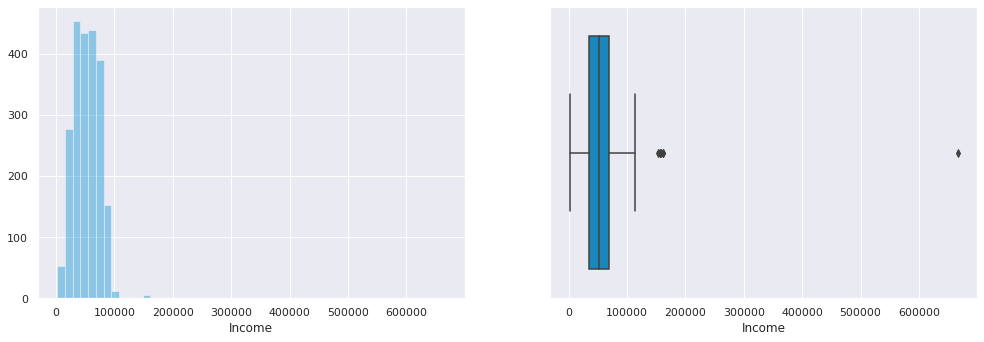

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.distplot(data['Income'], kde=False, hist=True, ax = ax[0])
sns.boxplot(x = data['Income'], ax = ax[1])

In [74]:
data.Income = data.Income.fillna(data.Income.median()).astype(int)

### Feature engineering

In [75]:
# check duplicate customers
len(data.ID.unique())

2240

In [76]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52237.970089,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.956074,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


- We can see that in the dataset there are several variables that we can eliminate, because they do not provide information:

    *Z_Revenue, Z_CostContact *: the min, maximum and mean coincide, and the deviation is 0, which is why they are columns with a single value.

    *ID *: Although it is a unique identifier of the client, it does not generate value to perform an analysis on this variable.
    

 - If we do an analysis of the acceptance of customer campaigns, we observe that campaign 2 was the one that obtained the least acceptance with more reliability because the deviation is low (later we will apply the analysis in this hypothesis).

| Statistician | AcceptedCmp1 | AcceptedCmp2 | AcceptedCmp3 | AcceptedCmp4 | AcceptedCmp5 |
| --- | --- | --- | --- | --- | --- |
| mean | 0.245316 | 0.114976 | 0.259813 | 0.262728 | 0.25981 |
| deviation | 0.064286 | 0.013393 | 0.072768 | 0.074554 | 0.072768 |


In [77]:
# Delete variables without information
data.drop(columns= ["Z_Revenue", "Z_CostContact", "ID"], inplace=True)

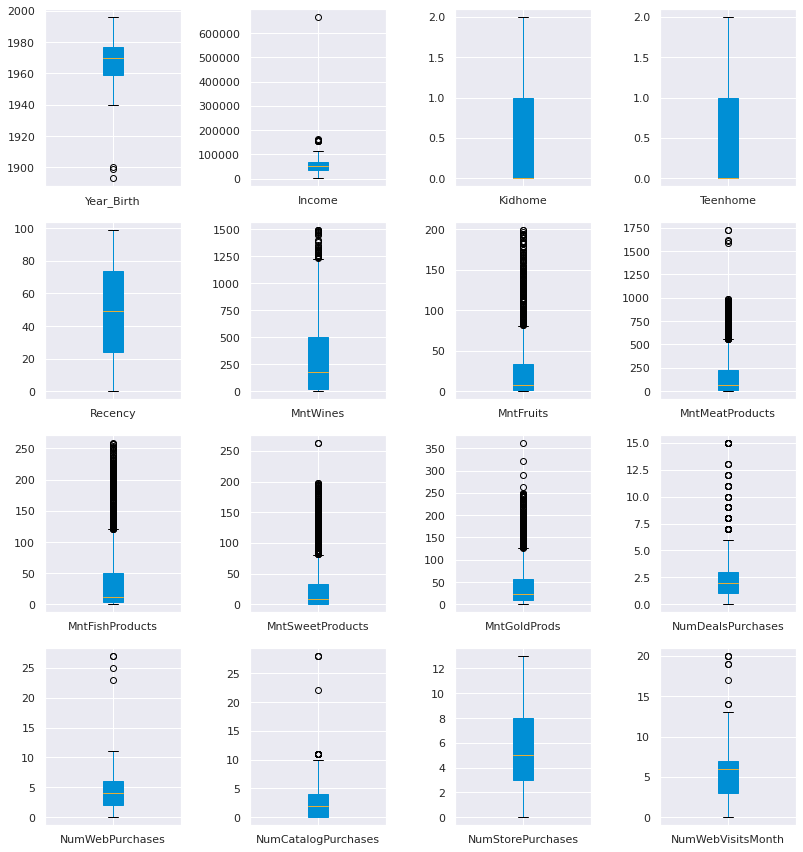

In [78]:
numerical_cols = data.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                              'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)
# subplots
numerical_cols.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

- In this dataset, people born between 1893 - 1996 will be analyzed, although it is a wide range, we will analyze if there are outiers in these ranges, we will use this date to create a variable * Age *.

- The variables "KidHome" and "TeenHome" express a singular behavior because 50% are zero.


In [79]:
# Create variable Age
data["Age"] = date.today().year - data["Year_Birth"]

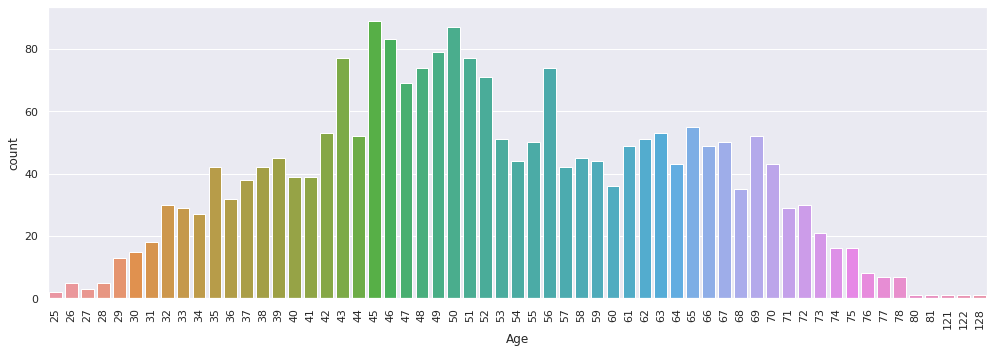

In [80]:
# plotting distribution Age
fig, ax = plt.subplots(figsize=(15,5))
g = sns.countplot(x = data['Age'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
fig.show()

This graphic show that exist variables outliers in the Age variables, perform a process for delete this.

No handles with labels found to put in legend.


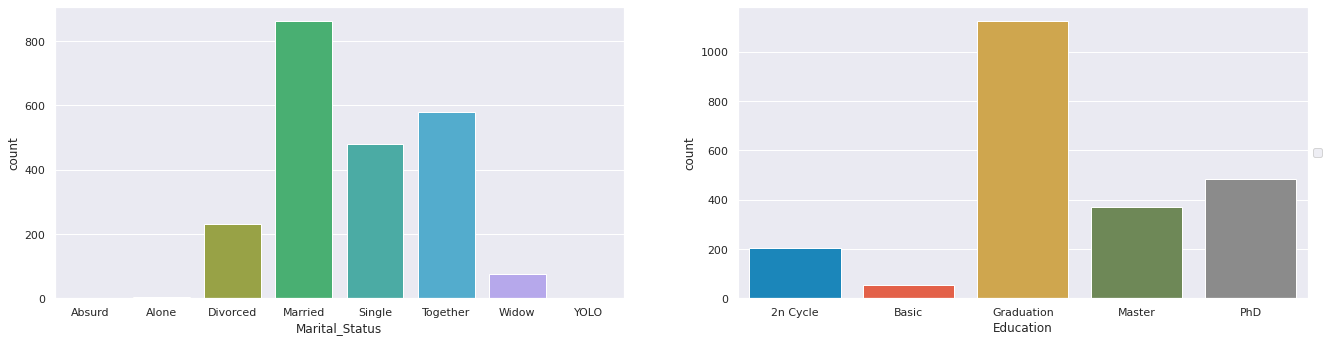

In [81]:
# view of the categorical variables
fig, ax = plt.subplots(1, 2, figsize=(20,5))
sns.countplot(x = 'Marital_Status', data = data, ax=ax[0])
sns.countplot(x = 'Education',  data = data, ax=ax[1])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
fig.show()

It is easy to see that the category variables "YOLO", "Absurd" and "Alone" can be included in the variables "Single" because they represent a category variables outliers.

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

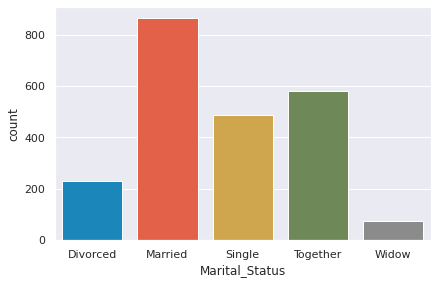

In [82]:
data['Marital_Status'] = data['Marital_Status'].replace(['Alone','Absurd','YOLO'],'Single')
sns.countplot(x = 'Marital_Status', data = data)

In [83]:
data.groupby(["Education", "Marital_Status"])[['MntWines', 'MntFruits', 'MntMeatProducts',
          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases','NumCatalogPurchases',
      'NumStorePurchases']].sum()

MntWines  MntFruits  MntMeatProducts  \
Education  Marital_Status                                         
2n Cycle   Divorced            8077        588             3466   
           Married            12537       2225             9935   
           Single              7768       1152             6564   
           Together           10740       1635             7789   
           Widow               1109        278              921   
Basic      Divorced               0          1                3   
           Married              304        309              340   
           Single                56        165              137   
           Together              28        122              114   
           Widow                  3          3               24   
Graduation Divorced           35769       3929            19395   
           Married           118022      12745            74136   
           Single             66818       8353            47679   
           Together           89309       8562            54154   
           Widow              10453       1094             6920   
Master     Divorced           11152        728             5073   
           Married            45225       2762            18698   
           Single             29538       1615            18427   
           Together           32118       2493            15523   
           Widow               5205        414             2729   
PhD        Divorced           20366       1117             6911   
           Married            82663       4194            35720   
           Single             36128       1783            15409   
           Together           45764       1891            19920   
           Widow              11664        759             3981   

                           MntFishProducts  MntSweetProducts  MntGoldProds  \
Education  Marital_Status                                                    
2n Cycle   Divorced                    764               932          1150   
           Married                    3370              2399          3861   
           Single                     1463              1191          1809   
           Together                   3524              2092          2378   
           Widow                       518               339           221   
Basic      Divorced                     10                 6             9   
           Married                     559               410           535   
           Single                      176               153           352   
           Together                    142                78           306   
           Widow                        34                 7            31   
Graduation Divorced                   4472              3949          5839   
           Married                   17918             13571         21638   
           Single                    11594              7479         13152   
           Together                  12970              8783         14690   
           Widow                      1676              1569          1988   
Master     Divorced                   1090               620          1735   
           Married                    3535              2861          5119   
           Single                     3124              1758          3292   
           Together                   3266              2148          3902   
           Widow                       862               448           899   
PhD        Divorced                   1794               715          2006   
           Married                    5187              3829          5846   
           Single                     2429              2593          2958   
           Together                   2713              2050          3661   
           Widow                       867               641          1232   

                           NumWebPurchases  NumCatalogPurchases  \
Education  Marital_Status                  

It is easy to see that the more degree of study he has and the marital status of the individual, the more he buys, which concludes that a possible form of segmentation could be this, and it can be noted that the categories where they are most accepted is the category of Wines. and meats

<AxesSubplot:>

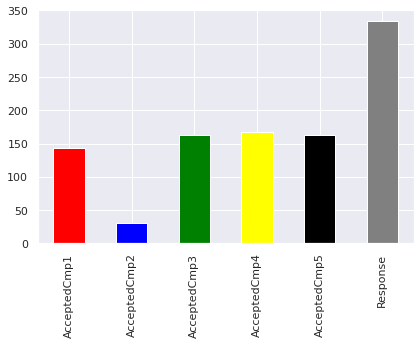

In [84]:
data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
      'AcceptedCmp4', 'AcceptedCmp5', "Response"]].sum(axis = 0).plot(kind = "bar", color = color)

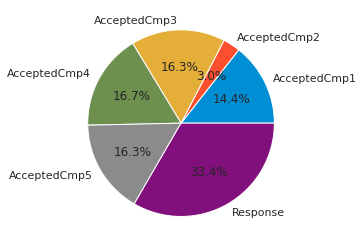

In [85]:
df_cmp = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
      'AcceptedCmp4', 'AcceptedCmp5', "Response"]].copy()
cmp_success = df_cmp.sum(axis = 0)
cmp_srate = df_cmp.sum(axis = 0) / len(df_cmp) * 100
plt.pie(x = cmp_srate, labels = df_cmp.columns, autopct = '%1.1f%%', shadow = False);

This graph shows us that the most inappropriate campaign was campaign 2, in addition to that the one that had the best effect was the last one, which had the highest number of people who accepted.

<AxesSubplot:>

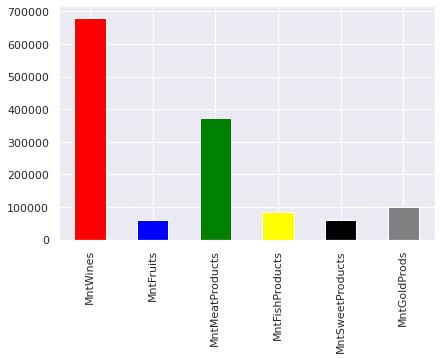

In [86]:
data[['MntWines', 'MntFruits', 'MntMeatProducts',
          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis = 0).plot(kind = "bar", color = color)


In [87]:
data_aux = pd.pivot_table(data = data, index = ['Marital_Status', 'Education'], values = ['Income'], 
                        aggfunc = 'sum')
data_aux.T

Marital_Status Divorced                                     Married          \
Education      2n Cycle Basic Graduation   Master      PhD 2n Cycle   Basic   
Income          1136088  9548    6488599  1862282  2761024  3747469  439210   

Marital_Status                                 Single                     \
Education      Graduation   Master       PhD 2n Cycle   Basic Graduation   
Income           21998835  7353472  11148988  1983643  328296   13046963   

Marital_Status                   Together                              \
Education        Master      PhD 2n Cycle   Basic Graduation   Master   
Income          4141610  5353689  2556620  297361   15942548  5520643   

Marital_Status             Widow                                     
Education           PhD 2n Cycle  Basic Graduation  Master      PhD  
Income          6552186   256961  22123    1924183  693798  1446914

<AxesSubplot:xlabel='Marital_Status,Education'>

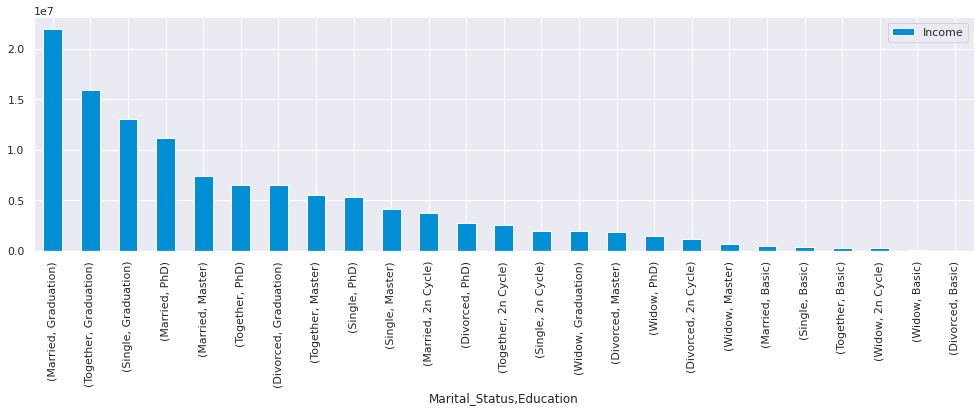

In [88]:
data_aux.sort_values(by = 'Income', ascending = False).plot(kind = 'bar', figsize=(15,4), rot = 90)

<AxesSubplot:title={'center':'NumStorePurchases'}>

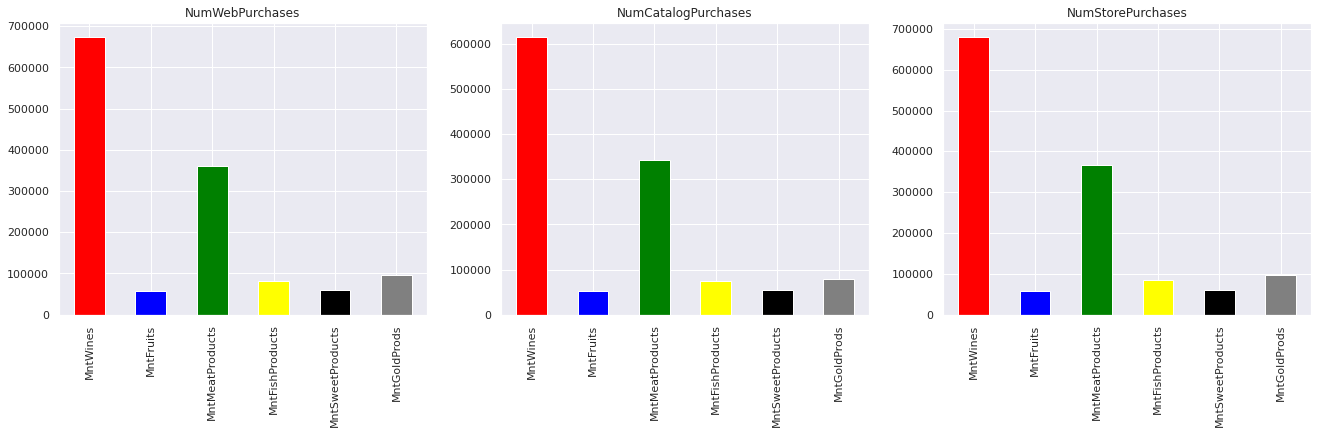

In [89]:

fig, ax = plt.subplots(1, 3, figsize=(20,5))
data[data['NumWebPurchases'] > 1][['MntWines', 'MntFruits', 'MntMeatProducts',
                                   'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().plot(kind = "bar", color = color, ax = ax[0], title = "NumWebPurchases")
data[data['NumCatalogPurchases'] > 1][['MntWines', 'MntFruits', 'MntMeatProducts',
                                   'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().plot(kind = "bar", color = color, ax = ax[1], title = "NumCatalogPurchases")
data[data['NumStorePurchases'] > 1][['MntWines', 'MntFruits', 'MntMeatProducts',
                                   'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().plot(kind = "bar", color = color, ax = ax[2], title = "NumStorePurchases")



### Transformations proposed for the categorical variables :

* *dtCustomer* create new columns with customer's enrollment in days 
* *Education* to Dummy Variables
* *Marital* to Dummy Variables


In [90]:
# number of days as a customer
data['Customer_Days'] = (pd.to_datetime(date.today()) - data['Dt_Customer']).dt.days

# Replace Educational to dummy columns
dummy_edu = pd.get_dummies(data['Education'], prefix='' , prefix_sep='')
data_pre = pd.concat([data, dummy_edu], axis=1)

# Marital to multiples using Dummy Variables
dummy_ms = pd.get_dummies(data_pre['Marital_Status'], prefix='' , prefix_sep='')
data_pre = pd.concat([data_pre, dummy_ms],axis=1)

# Drop unused columns
data_pre.drop(columns=['Marital_Status','Education','Year_Birth', 'Dt_Customer'], inplace=True)

# Sum of purchases
data_pre['MntTotal'] = data_pre[['MntWines', 'MntFruits', 'MntMeatProducts',
                                 'MntFishProducts', 'MntSweetProducts']].sum(axis=1)

# Regular Products
data_pre['MntRegularProds'] = data_pre.loc[:,'MntTotal'] - data_pre['MntGoldProds']

# Campaigns Accepted
data_pre['AcceptedCmpOverall'] = data_pre[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                                           'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

# delete space in the name of the column
data_pre = data_pre.rename(columns = {"2n Cycle": "SecondCycle"})

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Customer_Days'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'MntTotal'}>,
        <AxesSubplot:title={'center':'MntRegularProds'}>,
        <AxesSubplot:title={'center':'MntGoldProds'}>],
       [<AxesSubplot:title={'center':'AcceptedCmpOverall'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

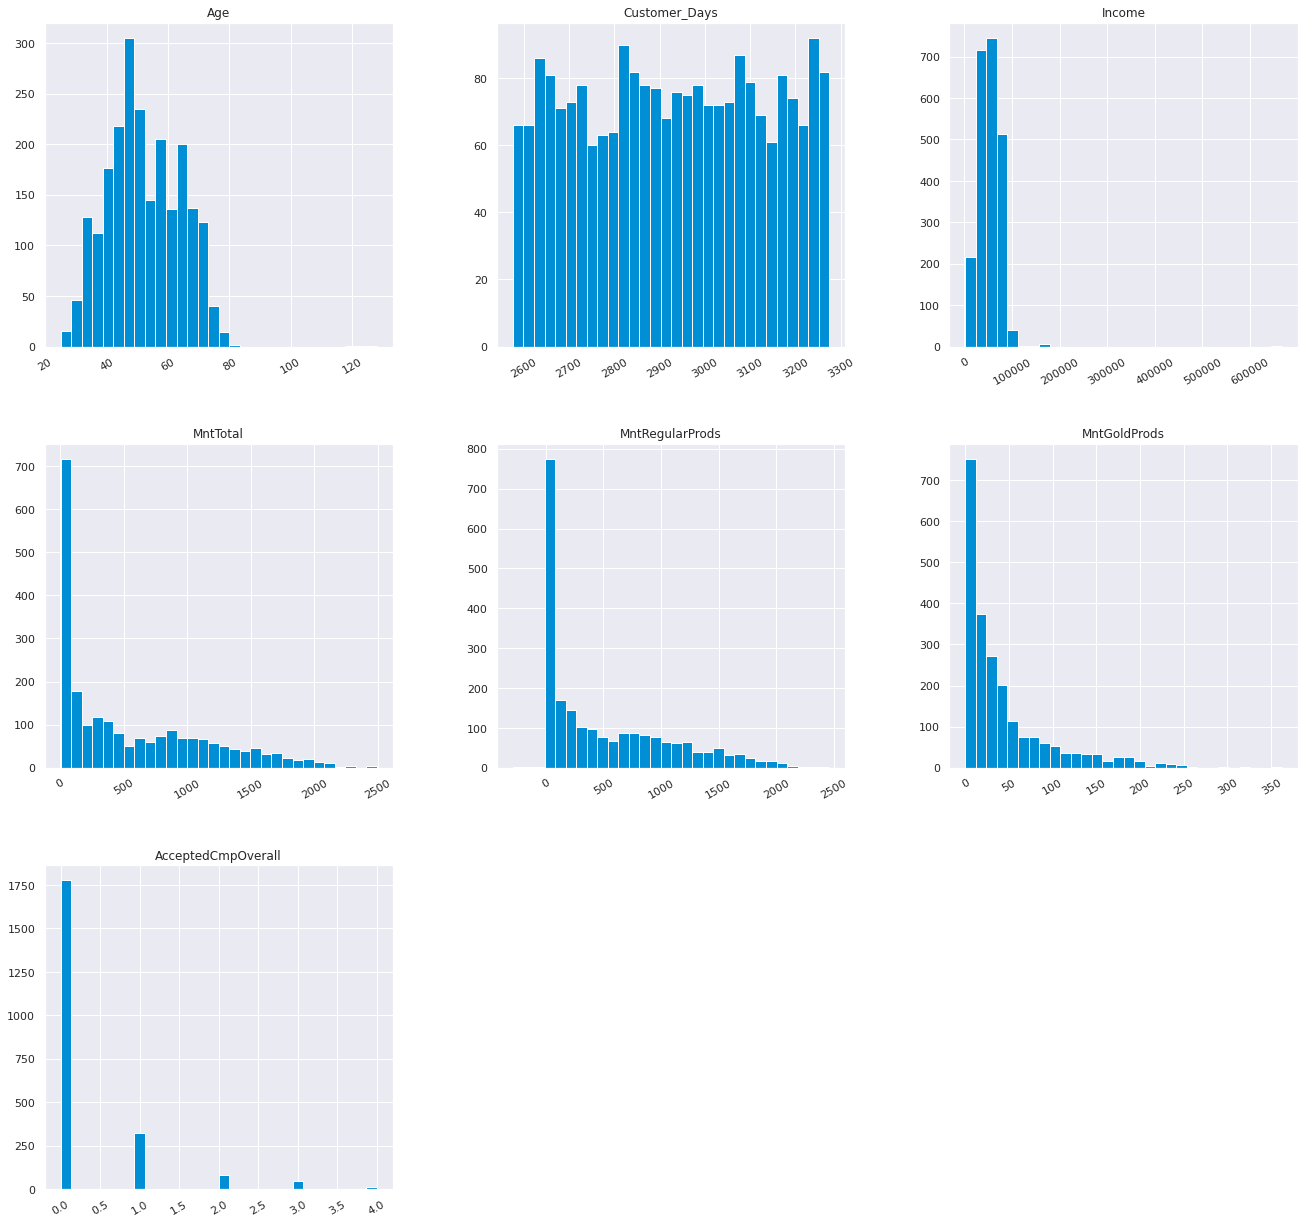

In [91]:
# plotting the new variables for view possibles insigths
cols = ['Age', 'Customer_Days', 'Income','MntTotal', 'MntRegularProds', 'MntGoldProds', 'AcceptedCmpOverall']
data_pre[cols].hist(column = cols, figsize=(20,20), bins = 30 ,xrot=30)

### Outliers and missing data in Income and Age columns

*Income*

<AxesSubplot:>

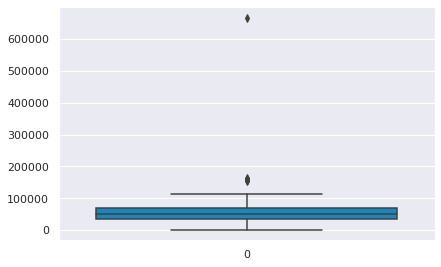

In [92]:
sns.boxplot(data = data_pre.Income)

Percentiles: 25th=68289.750, 75th=35538.750, IQR=-32751.000


<AxesSubplot:>

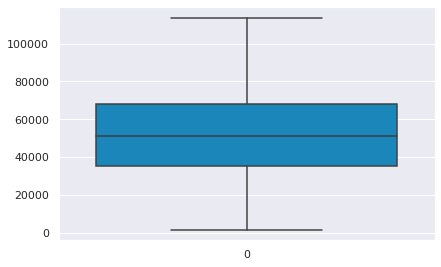

In [93]:
# sustitute outliers in Income using the intequantile range
Q1 = data_pre.Income.quantile(0.75)
Q3 = data_pre.Income.quantile(0.25)
IQR = Q3 - Q1
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (Q1, Q3, IQR))

# sustitute outliers by the median
cut_off = IQR * 1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
outliers = data_pre[(data_pre.Income > lower) | (data.Income < upper)].index
data_pre.loc[outliers, "Income"] = data_pre.Income.median()
sns.boxplot(data = data_pre.Income)

*Age*

<AxesSubplot:>

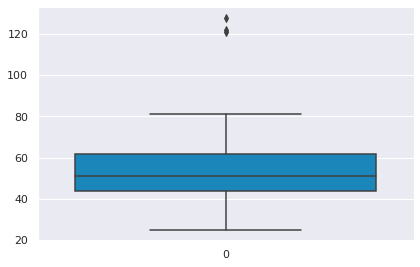

In [94]:
sns.boxplot(data = data_pre.Age)

Percentiles: 25th=62.000, 75th=44.000, IQR=-18.000


<AxesSubplot:>

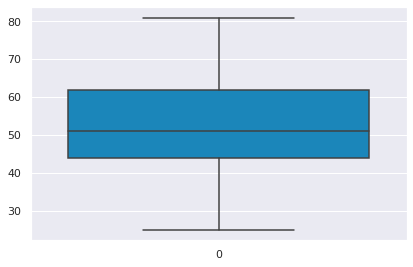

In [95]:
# sustitute outliers in Age using the intequantile range
Q1 = data_pre.Age.quantile(0.75)
Q3 = data_pre.Age.quantile(0.25)
IQR = Q3 - Q1
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (Q1, Q3, IQR))

# sustitute outliers by the median
cut_off = IQR * 1.5
lower, upper = Q1 - cut_off, Q3 + cut_off
outliers = data_pre[(data_pre.Age > lower) | (data.Age < upper)].index
data_pre.loc[outliers, "Age"] = data_pre.Age.median()
sns.boxplot(data = data_pre.Age)

### correlation analysis

In [96]:
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Days'],
      dtype='object')

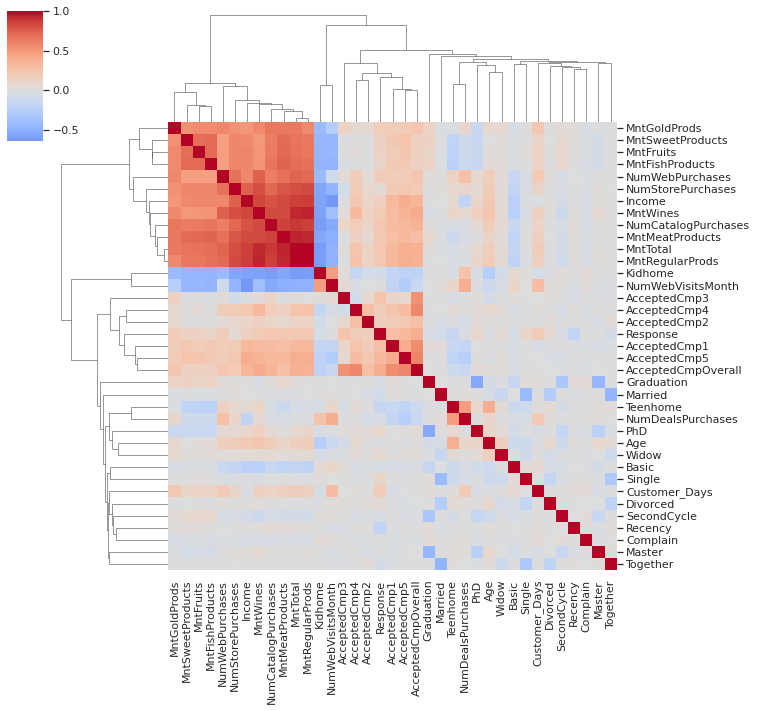

In [97]:
corr = data_pre.select_dtypes(include=np.number).corr(method = 'spearman')

# plot clustered heatmap of correlations
sns.clustermap(corr, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0);

- To identify patterns, we will first identify feature correlations. Positive correlations between features appear red, negative correlations appear blue, and no correlation appears grey in the clustered heatmap below.

- From this heatmap we can observe the following clusters of correlated features:
    - The "High Income" cluster:
         - Amount spent ('TotalMnt' and other 'Mnt' features) and number of purchases ('TotalPurchases' and other 'Num...Purchases' features) are positively correlated with 'Income'
          - Purchasing in store, on the web, or via the catalog 
            ('NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases')
            is positively correlated with 'Income'
     - The "Have Kids & Teens" cluster:
          - Amount spent ('TotalMnt' and other 'Mnt' features) and number of purchases ('TotalPurchases' and other 'Num...Purchases' features) are negatively correlated with 'Dependents' (with a stronger effect from kids vs. teens)
           - Purchasing deals ('NumDealsPurchases') is positively correlated with 'Dependents' (kids and/or teens) and negatively correlated with 'Income'
      - The "Advertising Campaigns" cluster:
           - Acceptance of the advertising campaigns ('AcceptedCmp' and 'Response') are strongly positively correlated with each other
           - Weak positive correlation of the advertising campaigns is seen with the "High Income" cluster, and weak negative correlation is seen with the "Have Kids & Teens" cluster
- Anomalies:
     - Surprisingly, the number of website visits in the last month ('NumWebVisitsMonth') does not correlate with an increased number of web purchases ('NumWebPurchases')
      - Instead, 'NumWebVisitsMonth' is positively correlated with the number of deals purchased ('NumDealsPurchases'), suggesting that suggesting that deals are an effective way of stimulating purchases on the website


In [98]:
# make the ranking of the relation more high between he variables
cor = corr.mask(np.triu(np.ones_like(corr, dtype=np.bool_), -1)).unstack().sort_values(ascending = False)
highcor = pd.DataFrame(cor[(abs(cor) > 0.75) | (cor < -0.55)], columns = ["correlation"])
highcor.sort_values(by = "correlation").style.background_gradient(cmap='coolwarm', low=-0.1, high=0.1)

Let's carry out an analysis of possible non-linear relationships between the variables, in case there are possible relationships that help us better understand the business

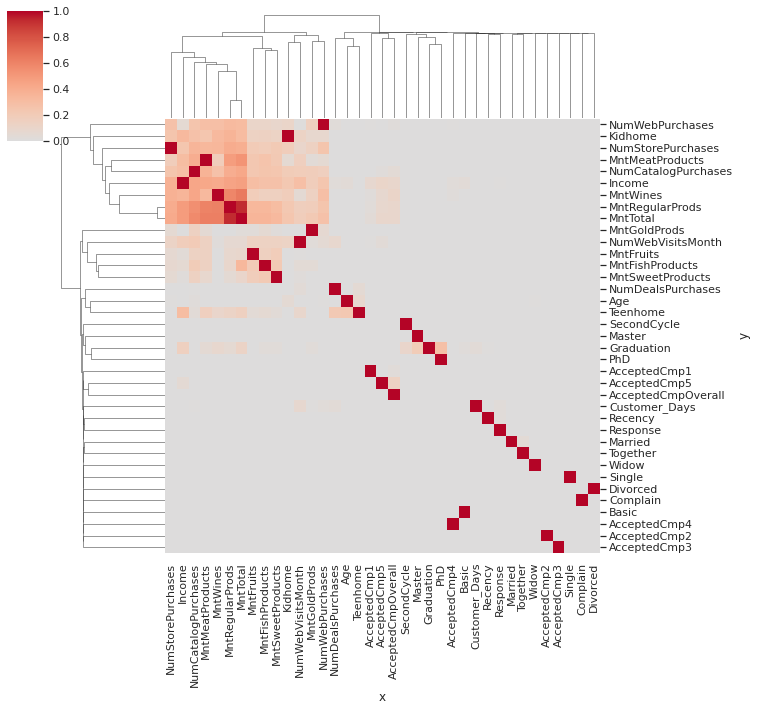

In [100]:
matrix_df = pps.matrix(data_pre)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.clustermap(matrix_df, cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0);

In [101]:
# Ranking of nolinear relations 
cor_nl = matrix_df.mask(np.triu(np.ones_like(matrix_df, dtype=np.bool_), -1)).unstack().sort_values(ascending = False)
highcor = pd.DataFrame(cor_nl [(abs(cor_nl ) > 0.4) | (cor_nl < -0.4)], columns = ["correlation"])
highcor.sort_values(by = "correlation").style.background_gradient(cmap='coolwarm', low=-0.1, high=0.1)

We observe that the same relationships that we found before are still manifested

### Segmentation
In this case we will perform the segmentation with an unsupervised method called Kmeans which performs a grouping, according to the characteristics that further separate the different classes.

In [102]:
cols = ['Income', 'Age', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntRegularProds','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'MntTotal'
       ]

In [103]:
data_aux = data_pre.copy()

In [104]:
from sklearn.preprocessing import RobustScaler
RS = RobustScaler()
data_aux[cols] = RS.fit_transform(data_aux[cols])

For n_clusters = 2, silhouette score is 0.4115359065657295
For n_clusters = 3, silhouette score is 0.29281908878221036
For n_clusters = 4, silhouette score is 0.26405902835968725
For n_clusters = 5, silhouette score is 0.26591160596636576
For n_clusters = 6, silhouette score is 0.2572884114313749
For n_clusters = 7, silhouette score is 0.26723543383458637


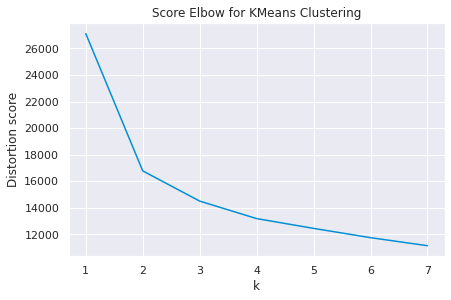

In [105]:
km_score= []

for i in range(1, 8):
    clusterer = KMeans(n_clusters=i,init='k-means++', max_iter=800,
                     n_init=10, random_state=12345, tol = 0.00001)
    
    preds = clusterer.fit_predict(data_aux[cols])
    centers = clusterer.cluster_centers_
    km_score.append(clusterer.inertia_)
    
    # cluster score
    if i > 1:
        # his method is use for more the one cluster
        score = silhouette_score (data_aux[cols], preds, metric='euclidean')
        print ("For n_clusters = {}, silhouette score is {}".format(i, score))
    
# Kmeans criterion for k from 2 to 10 
plt.plot(range(1,8), km_score)
plt.title('Score Elbow for KMeans Clustering')
plt.xlabel('k')
plt.ylabel('Distortion score')
plt.show()

In [107]:
# perform a copy of the dataset for make the analysis
traindata = data_aux[cols].copy()
traindata

,Income,Age,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntRegularProds,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntTotal
0,0.207528,0.722222,0.18,0.960458,2.50000,2.217593,3.404255,2.50000,1.368546,1.361702,0.5,1.00,2.00,-0.2,0.25,1.306931
1,-0.154701,0.888889,-0.22,-0.338189,-0.21875,-0.282407,-0.212766,-0.21875,-0.324036,-0.382979,0.0,-0.75,-0.25,-0.6,-0.25,-0.352035
2,0.621385,0.277778,-0.46,0.525494,1.28125,0.277778,2.106383,0.40625,0.479525,0.382979,-0.5,1.00,0.00,1.0,-0.50,0.432343
3,-0.759686,-0.777778,-0.46,-0.338189,-0.12500,-0.217593,-0.042553,-0.15625,-0.290801,-0.404255,0.0,-0.50,-0.50,-0.2,0.00,-0.322332
4,0.212288,-0.611111,0.90,-0.001041,1.09375,0.236111,0.723404,0.59375,0.123442,-0.191489,1.5,0.25,0.25,0.2,-0.25,0.072607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.302277,0.166667,-0.06,1.114464,1.09375,0.532407,0.638298,3.43750,0.663501,4.744681,0.0,1.25,0.25,-0.2,-0.25,0.828383
2236,0.387997,1.333333,0.14,0.483871,-0.25000,-0.171296,-0.255319,-0.25000,0.166172,-0.340426,2.5,1.00,0.00,0.0,0.25,0.104510
2237,0.171993,-0.611111,0.84,1.528616,1.25000,0.694444,0.425532,0.12500,1.074184,0.000000,-0.5,-0.50,0.25,1.6,0.00,0.963696
2238,0.548657,0.777778,-0.82,0.529657,0.68750,0.680556,1.446809,0.68750,0.513947,0.787234,0.0,0.50,0.75,1.0,-0.75,0.485149


In [108]:
# traning the Kmeans
model = KMeans(n_clusters=2, init='k-means++', max_iter=1000, n_init=10, random_state = 0, tol = 0.00001)
traindata ['cluster'] = model.fit_predict(traindata[cols])

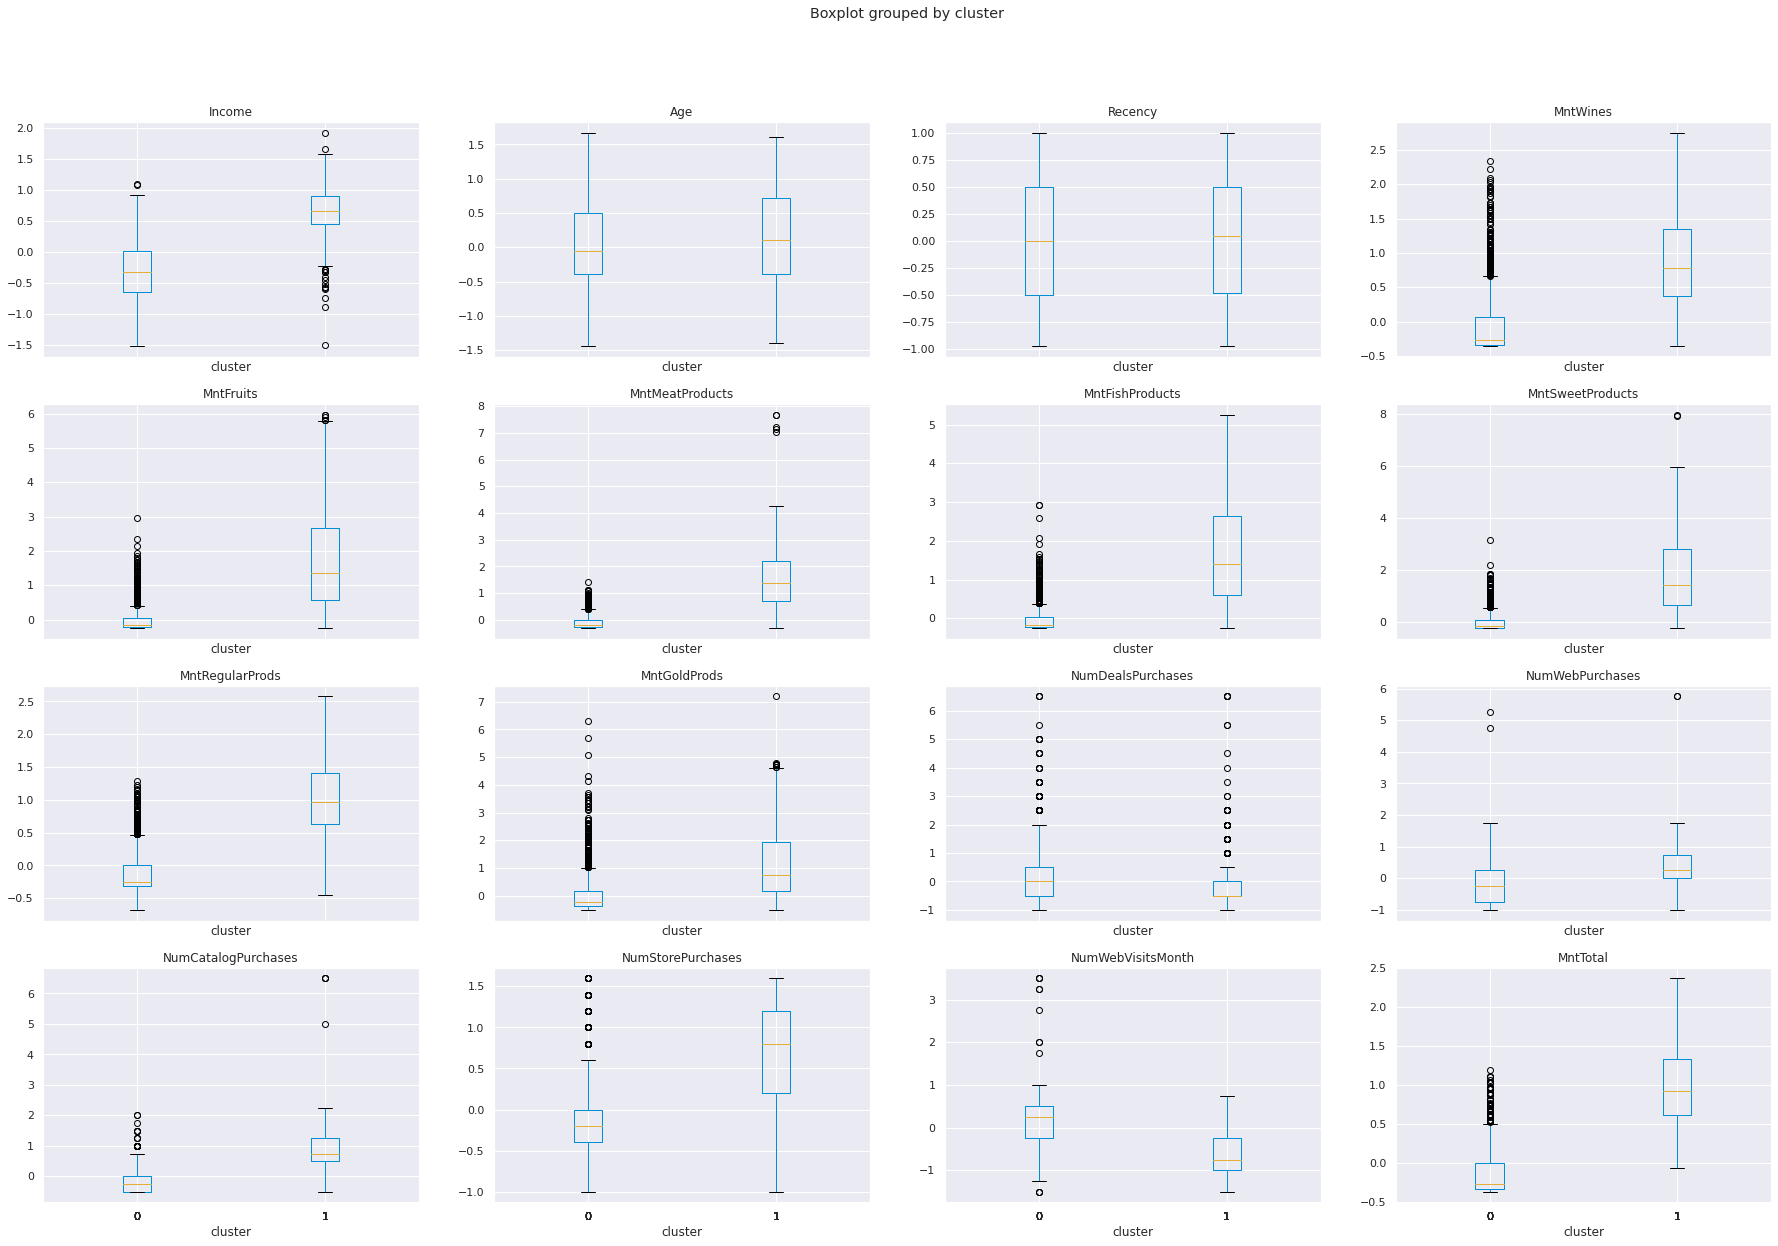

In [109]:
# plotting the differents distribucion for see the possibles groups creae by Kmeans
fig, axes = plt.subplots(4,4, sharex= True, sharey= False, figsize=(30,20))

traindata.boxplot(column=['Income', 'Age', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntRegularProds','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'MntTotal'
       ], ax = axes, by='cluster')
plt.show()

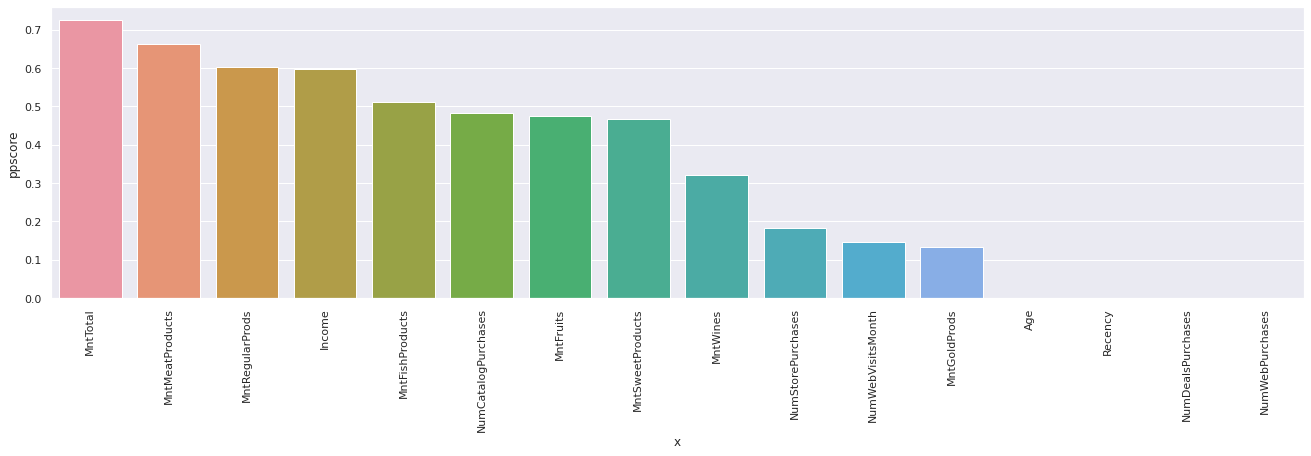

In [110]:
# the importance of the variables
fig, ax = plt.subplots(figsize=(20,5))
g = sns.barplot(data=pps.predictors(traindata[cols + ["cluster"]], y="cluster"), x="x", y="ppscore")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
fig.show()

<AxesSubplot:xlabel='MntGoldProds', ylabel='Count'>

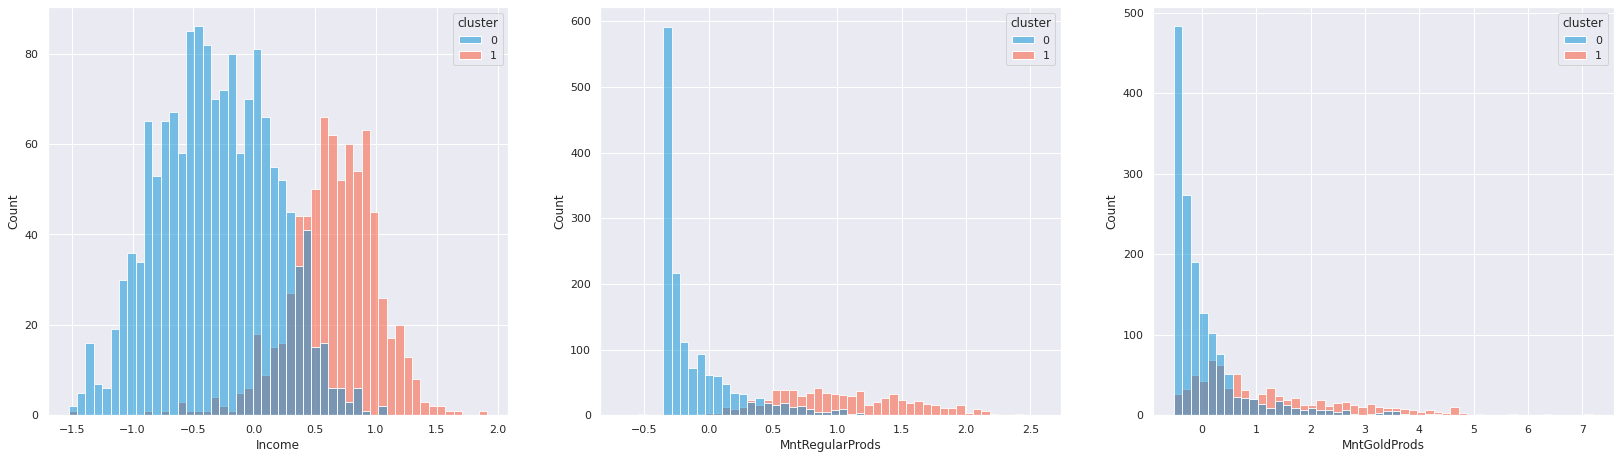

In [111]:
# review the differences between the two groups and analysis why Kmeans perform this separation
fig, ax = plt.subplots(1,3, figsize=(25,7))

sns.histplot(x="Income", hue="cluster", data=traindata, ax=ax[0], bins = 50)
sns.histplot(x="MntRegularProds", hue="cluster", data=traindata, ax=ax[1], bins = 50)
sns.histplot(x="MntGoldProds", hue="cluster", data=traindata, ax=ax[2], bins = 50)

In [115]:
# save the datasets for the part of prediction
data_aux.to_csv("traindata.csv", index = False)

In [116]:
data_aux

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days,SecondCycle,Basic,Graduation,Master,PhD,Divorced,Married,Single,Together,Widow,MntTotal,MntRegularProds,AcceptedCmpOverall
0,0.207528,0,0,0.18,0.960458,2.50000,2.217593,3.404255,2.50000,1.361702,0.5,1.00,2.00,-0.2,0.25,0,0,0,0,0,0,1,0.722222,3239,0,0,1,0,0,0,0,1,0,0,1.306931,1.368546,0
1,-0.154701,1,1,-0.22,-0.338189,-0.21875,-0.282407,-0.212766,-0.21875,-0.382979,0.0,-0.75,-0.25,-0.6,-0.25,0,0,0,0,0,0,0,0.888889,2689,0,0,1,0,0,0,0,1,0,0,-0.352035,-0.324036,0
2,0.621385,0,0,-0.46,0.525494,1.28125,0.277778,2.106383,0.40625,0.382979,-0.5,1.00,0.00,1.0,-0.50,0,0,0,0,0,0,0,0.277778,2888,0,0,1,0,0,0,0,0,1,0,0.432343,0.479525,0
3,-0.759686,1,0,-0.46,-0.338189,-0.12500,-0.217593,-0.042553,-0.15625,-0.404255,0.0,-0.50,-0.50,-0.2,0.00,0,0,0,0,0,0,0,-0.777778,2715,0,0,1,0,0,0,0,0,1,0,-0.322332,-0.290801,0
4,0.212288,1,0,0.90,-0.001041,1.09375,0.236111,0.723404,0.59375,-0.191489,1.5,0.25,0.25,0.2,-0.25,0,0,0,0,0,0,0,-0.611111,2737,0,0,0,0,1,0,1,0,0,0,0.072607,0.123442,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.302277,0,1,-0.06,1.114464,1.09375,0.532407,0.638298,3.43750,4.744681,0.0,1.25,0.25,-0.2,-0.25,0,0,0,0,0,0,0,0.166667,2957,0,0,1,0,0,0,1,0,0,0,0.828383,0.663501,0
2236,0.387997,2,1,0.14,0.483871,-0.25000,-0.171296,-0.255319,-0.25000,-0.340426,2.5,1.00,0.00,0.0,0.25,0,0,0,1,0,0,0,1.333333,2595,0,0,0,0,1,0,0,0,1,0,0.104510,0.166172,1
2237,0.171993,0,0,0.84,1.528616,1.25000,0.694444,0.425532,0.12500,0.000000,-0.5,-0.50,0.25,1.6,0.00,0,1,0,0,0,0,0,-0.611111,2731,0,0,1,0,0,1,0,0,0,0,0.963696,1.074184,1
2238,0.548657,0,1,-0.82,0.529657,0.68750,0.680556,1.446809,0.68750,0.787234,0.0,0.50,0.75,1.0,-0.75,0,0,0,0,0,0,0,0.777778,2732,0,0,0,1,0,0,0,0,1,0,0.485149,0.513947,0
